In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Task 1

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

#Task 2

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


#Task 3
As we could not find any missing values so we will ignore handling missing values.

In [ ]:
missingValues = df.isnull().sum()
print(missingValues)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Checking for outliers
describe = df.describe()
q1 = describe.loc['25%']
q3 = describe.loc['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Handle outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

<ipython-input-6-d64d7a2bb455>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [ ]:
#summary of my data and data type
summary = df.describe()
print(summary)

dataTypes = df.dtypes
print(dataTypes)

       math score  reading score  writing score
count  988.000000     988.000000     988.000000
mean    66.625506      69.640688      68.566802
std     14.409394      14.016760      14.525267
min     27.000000      29.000000      27.000000
25%     57.000000      60.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     77.000000      80.000000      79.000000
max    100.000000     100.000000     100.000000
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


#Task 4


In [ ]:
genderCounts = df['gender'].value_counts()
print(genderCounts)

female    510
male      478
Name: gender, dtype: int64


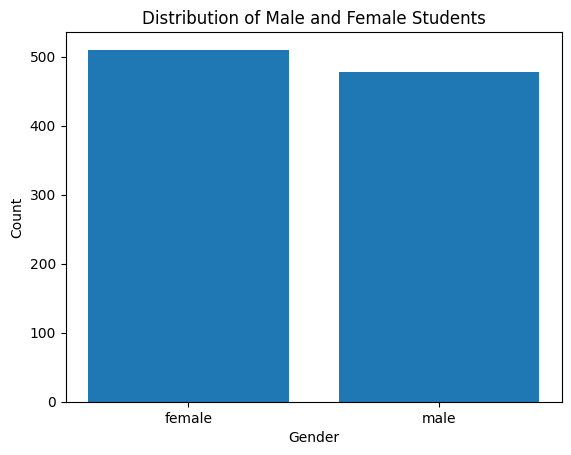

In [ ]:
#Creating a bar plot to show the distribution of male and female students in the dataset:
plt.bar(genderCounts.index, genderCounts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Male and Female Students')
plt.show()

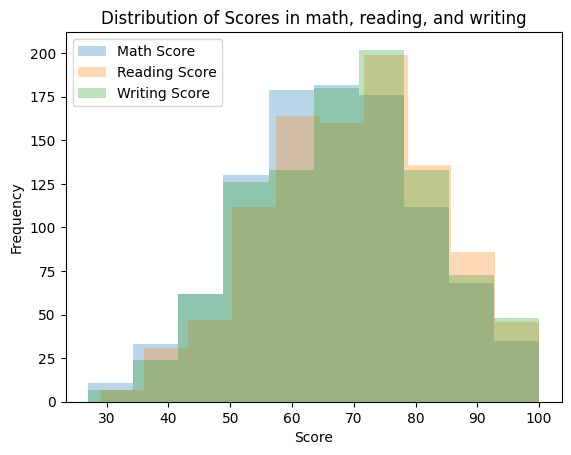

In [ ]:
#Creating a histogram to show the distribution of scores in math, reading, and writing:
plt.hist(df['math score'], alpha=0.3, label='Math Score')
plt.hist(df['reading score'], alpha=0.3, label='Reading Score')
plt.hist(df['writing score'], alpha=0.3, label='Writing Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores in math, reading, and writing')
plt.legend()
plt.show()

In [ ]:
#Createing a bar plot to show the average scores in math, reading, and writing for each gender:
genderAvgScores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(genderAvgScores)

        math score  reading score  writing score
gender                                          
female   64.356863      73.231373      73.158824
male     69.046025      65.809623      63.667364


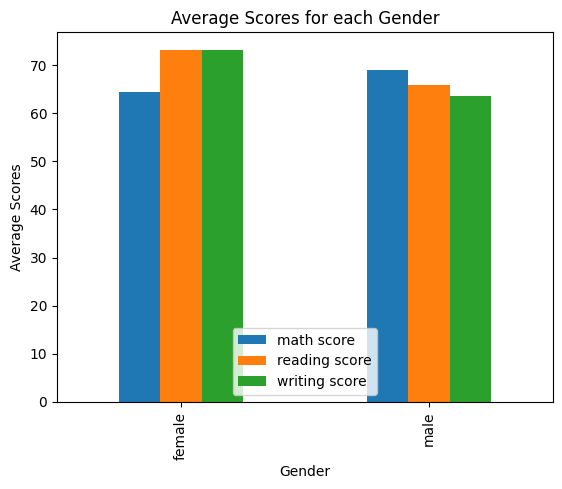

In [ ]:
genderAvgScores.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average Scores')
plt.title('Average Scores for each Gender')
plt.show()

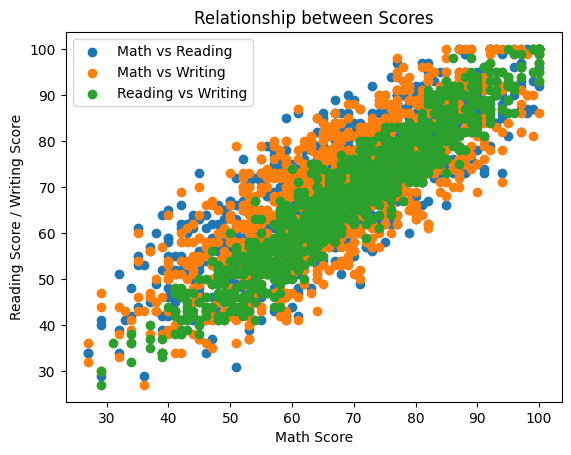

In [ ]:
#Creating a scatter plot to show the relationship between math, reading, and writing scores:
plt.scatter(df['math score'], df['reading score'], label='Math vs Reading')
plt.scatter(df['math score'], df['writing score'], label='Math vs Writing')
plt.scatter(df['reading score'], df['writing score'], label='Reading vs Writing')
plt.xlabel('Math Score')
plt.ylabel('Reading Score / Writing Score')
plt.title('Relationship between Scores')
plt.legend()
plt.show()


# Task 5

In [ ]:
# Calculating the mean, median, and mode for math, reading, and writing scores:
meanScores = df[['math score', 'reading score', 'writing score']].mean()
medianScores = df[['math score', 'reading score', 'writing score']].median()
modeScores = df[['math score', 'reading score', 'writing score']].mode()

print("Mean Scores: ",meanScores)
print("\nMedian Scores: ", medianScores)
print("\nMode Scores: ", modeScores)


Mean Scores:  math score       66.625506
reading score    69.640688
writing score    68.566802
dtype: float64

Median Scores:  math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

Mode Scores:  math score       65
reading score    72
writing score    74
Name: 0, dtype: int64


In [ ]:
#Calculating the standard deviation for math, reading, and writing scores:

stdScores = df[['math score', 'reading score', 'writing score']].std()
print("Standard Deviation Scores: ", stdScores)

Standard Deviation Scores:  math score       14.409394
reading score    14.016760
writing score    14.525267
dtype: float64


In [ ]:
#Testing if there's a significant difference between male and female students' performance in math, reading, and writing using an appropriate statistical test (e.g., t-test):

import scipy.stats as stats

math_male = df.loc[df['gender'] == 'male', 'math score']
reading_male = df.loc[df['gender'] == 'male', 'reading score']
writing_male = df.loc[df['gender'] == 'male', 'writing score']


math_female = df.loc[df['gender'] == 'female', 'math score']
reading_female = df.loc[df['gender'] == 'female', 'reading score']
writing_female = df.loc[df['gender'] == 'female', 'writing score']

mathTtest = stats.ttest_ind(math_male, math_female)
print("\nMath Scores T-test:", mathTtest)
readingTtest = stats.ttest_ind(reading_male, reading_female)
print("\nReading Scores T-test:",readingTtest)
writingTtest = stats.ttest_ind(writing_male, writing_female)
print("\nWriting Scores T-test:", writingTtest)



Math Scores T-test: Ttest_indResult(statistic=5.178169582240909, pvalue=2.71577698038836e-07)

Reading Scores T-test: Ttest_indResult(statistic=-8.62061152585355, pvalue=2.620260674043715e-17)

Writing Scores T-test: Ttest_indResult(statistic=-10.854785667078112, pvalue=5.228274821794767e-26)


# Task 6
## Bar Plot of Male and Female Students Distribution:
It shows the count of male and female students. From the plot, we can see that the portion of female is higher than male.
## Histograms of Math, Reading, and Writing Scores:
The histograms display the distribution of scores in math, reading, and writing.
From the histogram we can see a similar pattern of score in all of them. We dont see any unusual patterns.
## Bar Plot of Average Scores by Gender:
The bar plot compares the average scores in math, reading, and writing between male and female students. From the result we can see that Male average score in math is better and average reading and writing score is better for female.
## T-test result
The result shows male students tend to have higher math scores, while female students tend to have higher reading and writing scores.

##Conclusion
The analysis reveals significant differences in performance between male and female students. Male students tend to perform better in math, while female students tend to perform better in reading and writing. The mean and median scores suggest that, on average, students perform similarly in math, reading, and writing. The standard deviation results indicate that there is some degree of variability in the scores across all three subjects. This suggests that there is diversity in the performance levels of the students, with some students scoring significantly higher or lower than the mean score.


